In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.utils.data import DataLoader
import torch.nn as nn
from tqdm import tqdm
from colorama import Fore, Style

# Use STIX font for matplotlib
plt.rcParams["font.family"] = "STIXGeneral"

### Lab Task 1

In [3]:
epochs = 3
batch_size = 128
lr = 0.001
log_interval = 100

random_seed = 42
torch.manual_seed(random_seed)

In [3]:
"""
Build a simple convolutional neural network in PyTorch and train it to recognize handwritten digits using the MNIST dataset.
"""

# Load the MNIST dataset
train_loader = DataLoader(
    torchvision.datasets.MNIST(
        "./",
        train=True,
        download=True,
        transform=Compose([ToTensor(), Normalize((0.1307,), (0.3081,))]),
    ),
    batch_size=batch_size,
    shuffle=True,
)

test_loader = DataLoader(
    torchvision.datasets.MNIST(
        "./",
        train=False,
        download=True,
        transform=Compose([ToTensor(), Normalize((0.1307,), (0.3081,))]),
    ),
    batch_size=1000,
    shuffle=True,
)

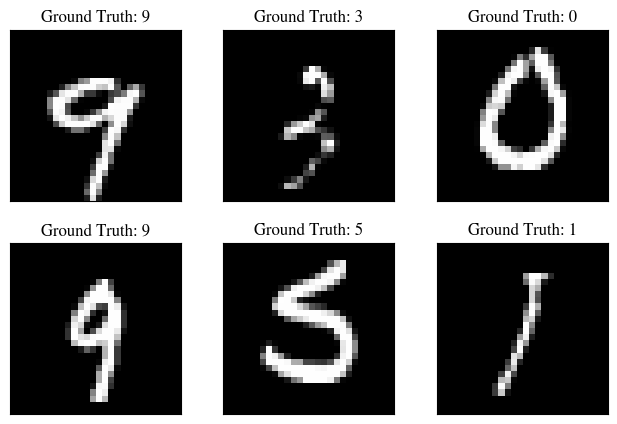

In [4]:
# Visualize the dataset
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap="gray", interpolation="none")
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [5]:
# Define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(in_features=1600, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        self.relu = nn.ReLU()
        self.max_pool = nn.MaxPool2d(kernel_size=2)

    def forward(self, x):
        x = self.relu(self.max_pool(self.conv1(x)))
        x = self.relu(self.max_pool(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 1600)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

# Define the loss function and optimizer
model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [6]:
# train the model and evaluate it on the test set
for i in range(epochs):
    print(f"{Fore.CYAN}Epoch: {i + 1}/{epochs}{Style.RESET_ALL}")

    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0 or batch_idx == len(train_loader) - 1:
            print(
                f">> Batch: {batch_idx + 1}/{len(train_loader)}\tLoss: {loss.item():.6f}"
            )
            if batch_idx == len(train_loader) - 1:
                print()

# Evaluate the model
model.eval()

test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for data, targets in test_loader:
        scores = model(data)
        loss = criterion(scores, targets)
        test_loss += loss.item()
        _, predicted = scores.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
    print(f"{Fore.GREEN}Test Loss: {test_loss / len(test_loader):.6f}{Style.RESET_ALL}")
    print(f"{Fore.GREEN}Test Accuracy: {correct / total * 100:.2f}%{Style.RESET_ALL}")

Epoch: 1/3
>> Batch: 1/469	Loss: 2.318476
>> Batch: 101/469	Loss: 0.373859
>> Batch: 201/469	Loss: 0.070763
>> Batch: 301/469	Loss: 0.114071
>> Batch: 401/469	Loss: 0.068629
>> Batch: 469/469	Loss: 0.098170

Epoch: 2/3
>> Batch: 1/469	Loss: 0.117929
>> Batch: 101/469	Loss: 0.048045
>> Batch: 201/469	Loss: 0.137170
>> Batch: 301/469	Loss: 0.107700
>> Batch: 401/469	Loss: 0.022837
>> Batch: 469/469	Loss: 0.019670

Epoch: 3/3
>> Batch: 1/469	Loss: 0.101240
>> Batch: 101/469	Loss: 0.034699
>> Batch: 201/469	Loss: 0.034792
>> Batch: 301/469	Loss: 0.083300
>> Batch: 401/469	Loss: 0.132616
>> Batch: 469/469	Loss: 0.025354

Test Loss: 0.029462
Test Accuracy: 99.01%


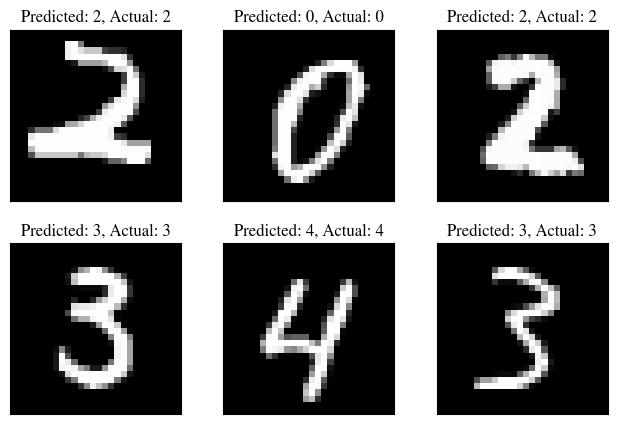

In [7]:
# Visualize the predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    scores = model(example_data)
    _, predicted = scores.max(1)
    
fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap="gray", interpolation="none")
    plt.title(
        f"Predicted: {predicted[i]}, Actual: {example_targets[i]}"
    )
    plt.xticks([])
    plt.yticks([])

### Lab Task 2

In [2]:
epochs = 10
batch_size = 128
lr = 0.001
log_interval = 100

random_seed = 42
torch.manual_seed(random_seed)

In [3]:
"""
Build a simple convolutional neural network in PyTorch and train it to recognize following fashion object  using the fashion MNIST dataset. 

10 classes (Tshirt, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)
"""

class_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

# Load the MNIST dataset
train_loader = DataLoader(
    torchvision.datasets.FashionMNIST(
        "./",
        train=True,
        download=True,
        transform=Compose([ToTensor(), Normalize((0.1307,), (0.3081,))]),
    ),
    batch_size=batch_size,
    shuffle=True,
)

test_loader = DataLoader(
    torchvision.datasets.FashionMNIST(
        "./",
        train=False,
        download=True,
        transform=Compose([ToTensor(), Normalize((0.1307,), (0.3081,))]),
    ),
    batch_size=1000,
    shuffle=True,
)

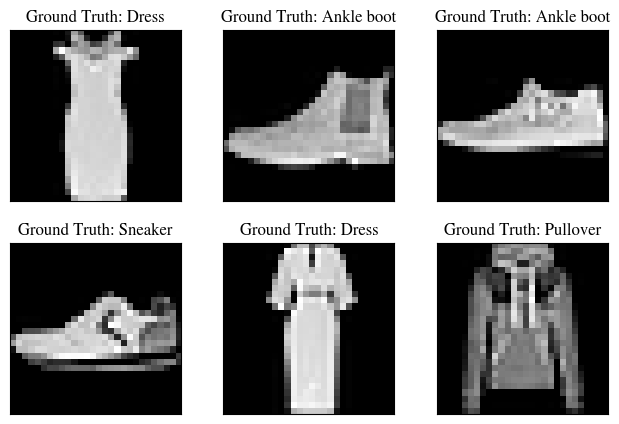

In [4]:
# Visualize the dataset
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap="gray", interpolation="none")
    plt.title("Ground Truth: {}".format(class_mapping[int(example_targets[i])]))
    plt.xticks([])
    plt.yticks([])

In [5]:
# Define the model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(in_features=1600, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)
        self.relu = nn.ReLU()
        self.max_pool = nn.MaxPool2d(kernel_size=2)

    def forward(self, x):
        x = self.relu(self.max_pool(self.conv1(x)))
        x = self.relu(self.max_pool(self.conv2_drop(self.conv2(x))))
        x = x.view(-1, 1600)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

# Define the loss function and optimizer
model = CNN()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [6]:
# train the model and evaluate it on the test set
for i in range(epochs):
    print(f"{Fore.CYAN}Epoch: {i + 1}/{epochs}{Style.RESET_ALL}")

    for batch_idx, (data, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores, targets)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0 or batch_idx == len(train_loader) - 1:
            print(
                f">> Batch: {batch_idx + 1}/{len(train_loader)}\tLoss: {loss.item():.6f}"
            )
            if batch_idx == len(train_loader) - 1:
                print()

# Evaluate the model
model.eval()

test_loss = 0
correct = 0
total = 0

with torch.no_grad():
    for data, targets in test_loader:
        scores = model(data)
        loss = criterion(scores, targets)
        test_loss += loss.item()
        _, predicted = scores.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
    print(f"{Fore.GREEN}Test Loss: {test_loss / len(test_loader):.6f}{Style.RESET_ALL}")
    print(f"{Fore.GREEN}Test Accuracy: {correct / total * 100:.2f}%{Style.RESET_ALL}")

Epoch: 1/10
>> Batch: 1/469	Loss: 2.296879
>> Batch: 101/469	Loss: 0.618329
>> Batch: 201/469	Loss: 0.483726
>> Batch: 301/469	Loss: 0.525971
>> Batch: 401/469	Loss: 0.339045
>> Batch: 469/469	Loss: 0.389650

Epoch: 2/10
>> Batch: 1/469	Loss: 0.394437
>> Batch: 101/469	Loss: 0.254581
>> Batch: 201/469	Loss: 0.283461
>> Batch: 301/469	Loss: 0.396587
>> Batch: 401/469	Loss: 0.388165
>> Batch: 469/469	Loss: 0.470048

Epoch: 3/10
>> Batch: 1/469	Loss: 0.363270
>> Batch: 101/469	Loss: 0.299441
>> Batch: 201/469	Loss: 0.240793
>> Batch: 301/469	Loss: 0.262007
>> Batch: 401/469	Loss: 0.337585
>> Batch: 469/469	Loss: 0.447462

Epoch: 4/10
>> Batch: 1/469	Loss: 0.349448
>> Batch: 101/469	Loss: 0.226724
>> Batch: 201/469	Loss: 0.225267
>> Batch: 301/469	Loss: 0.269906
>> Batch: 401/469	Loss: 0.294687
>> Batch: 469/469	Loss: 0.462739

Epoch: 5/10
>> Batch: 1/469	Loss: 0.252700
>> Batch: 101/469	Loss: 0.251120
>> Batch: 201/469	Loss: 0.237448
>> Batch: 301/469	Loss: 0.289594
>> Batch: 401/469	Loss

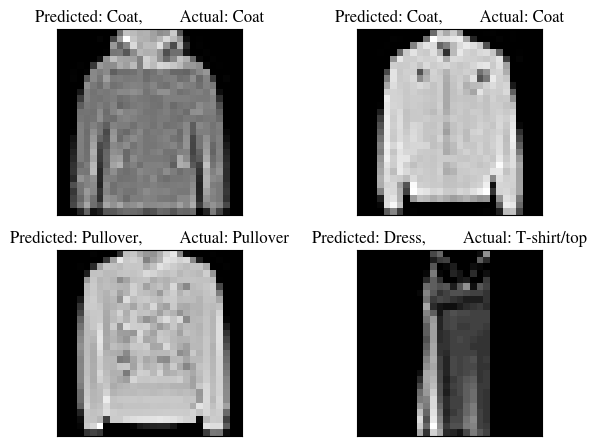

In [22]:
# Visualize the predictions
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

with torch.no_grad():
    scores = model(example_data)
    _, predicted = scores.max(1)

fig = plt.figure()
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap="gray", interpolation="none")
    plt.title(
        f"Predicted: {class_mapping[int(predicted[i])]}, \
        Actual: {class_mapping[int(example_targets[i])]}"
    )
    plt.xticks([])
    plt.yticks([])